In [ ]:
pip install astroquery matplotlib numpy astropy

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astroquery.gaia import Gaia
from astropy.table import Table

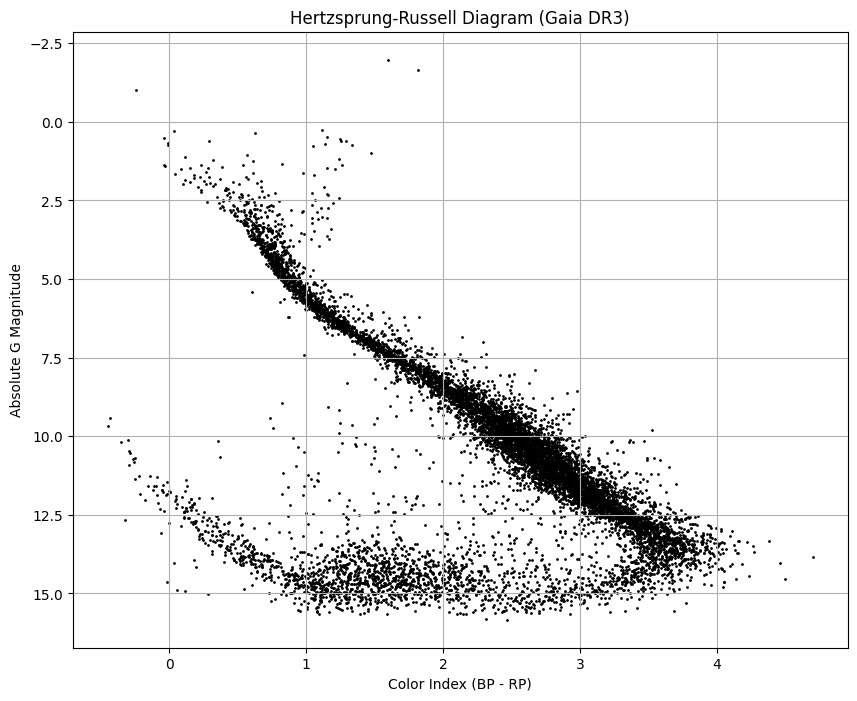

In [3]:
# Enable login-less access to Gaia
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"

# Query 10,000 nearby stars with reliable measurements
query = """
SELECT TOP 10000
    phot_g_mean_mag + 5 * log10(parallax/1000.0) + 5 AS abs_g_mag,
    bp_rp, parallax
FROM gaiadr3.gaia_source
WHERE parallax > 10 AND parallax_over_error > 10
  AND phot_g_mean_mag IS NOT NULL
  AND bp_rp IS NOT NULL
"""
job = Gaia.launch_job(query)
data = job.get_results()

# Extract color index (BP-RP) and absolute magnitude
color = data["bp_rp"]
abs_mag = data["abs_g_mag"]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(color, abs_mag, s=1, color='black')
plt.gca().invert_yaxis()
plt.xlabel("Color Index (BP - RP)")
plt.ylabel("Absolute G Magnitude")
plt.title("Hertzsprung-Russell Diagram (Gaia DR3)")
plt.grid(True)
plt.show()
